In [1]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

(1409, 13)
Index(['ct', 'poverty_score', 'median_age_no_insurance', 'hispanic_prop',
       'MFratio', 'household_median_income', 'white', 'black', 'native',
       'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop',
       'STATEFP_x', 'COUNTYFP_x', 'TRACTCE_x', 'GEOID_x', 'NAME_x',
       'NAMELSAD_x', 'MTFCC_x', 'FUNCSTAT_x', 'ALAND_x', 'AWATER_x',
       'INTPTLAT_x', 'INTPTLON_x', 'geometry_x', 'STATEFP_y', 'COUNTYFP_y',
       'TRACTCE_y', 'GEOID_y', 'NAME_y', 'NAMELSAD_y', 'MTFCC_y', 'FUNCSTAT_y',
       'ALAND_y', 'AWATER_y', 'INTPTLAT_y', 'INTPTLON_y', 'geometry_y'],
      dtype='object')


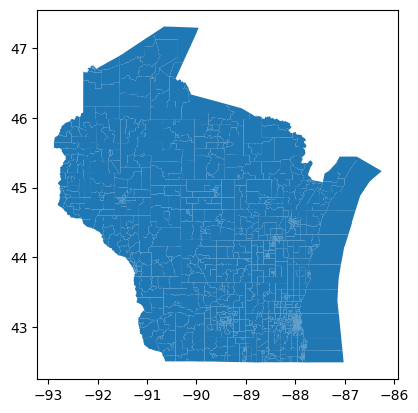

In [5]:
# use joined data
# df_joined = pd.read_csv ('Joined_data.csv')
df_joined = pd.read_csv ('../joined_data/joined_data_CHR_simplified.csv')

df_joined


geo = gpd.read_file("zip://../ct_data/tl_2019_55_tract.zip")
geo.plot()
print(geo.shape)
# print(geo.head(1))

geo['GEOID']=geo['GEOID'].astype(np.int64)
df_joined = gpd.GeoDataFrame(pd.merge(df_joined,geo,how="left",left_on="ct",right_on = "GEOID"))
print(df_joined.columns)

In [7]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import libpysal.weights as weights
import libpysal

In [8]:
kd = libpysal.cg.KDTree(np.array(df_joined[["INTPTLAT_y","INTPTLON_y"]].values))
wnn = libpysal.weights.KNN(kd, 3)
nearest_pt = pd.DataFrame().from_dict(wnn.neighbors, orient="index")
for i in range(nearest_pt.shape[1]):
    nearest_pt = nearest_pt.rename({i:f"n_pt_{i}"}, axis=1)
nearest_pt.head(1)
print(nearest_pt)



      n_pt_0  n_pt_1  n_pt_2
0       1388       2    1387
1          4       2       3
2          0       1       3
3          5       2       1
4          1     403       5
...      ...     ...     ...
1385    1386    1384    1387
1386    1385    1387    1382
1387    1386    1382    1385
1388    1386    1385    1387
1389    1384    1385    1381

[1390 rows x 3 columns]


In [9]:
df_joined.reset_index(inplace=True)
df_joined

,index,ct,poverty_score,median_age_no_insurance,hispanic_prop,MFratio,household_median_income,white,black,native,...,GEOID_y,NAME_y,NAMELSAD_y,MTFCC_y,FUNCSTAT_y,ALAND_y,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry_y
0,0,55001950100,5431.44,37.500000,0.004089,1.051013,55562.00,2853,0,7,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,1,55001950201,2309.87,36.382979,0.017870,1.013493,41071.00,1297,0,11,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,2,55001950202,4337.65,39.923077,0.027896,1.211654,39897.00,2529,5,7,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,3,55001950400,6902.39,34.519634,0.043718,0.996033,36909.75,4322,41,16,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,4,55001950501,2507.76,38.783898,0.045665,1.255224,32805.00,1469,35,7,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1385,55141011300,7401.59,40.608959,0.005907,0.975724,46504.40,3897,0,0,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1386,1386,55141011400,8842.79,35.365741,0.012783,0.745436,40607.80,4901,117,12,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1387,1387,55141011500,11126.11,30.387640,0.006858,0.986717,75201.50,5611,11,25,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1388,1388,55141011600,8855.04,41.214041,0.000000,1.039644,52031.00,5009,0,33,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


In [10]:

df_joined = df_joined.join(nearest_pt)
df_joined.head(1)


,index,ct,poverty_score,median_age_no_insurance,hispanic_prop,MFratio,household_median_income,white,black,native,...,MTFCC_y,FUNCSTAT_y,ALAND_y,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry_y,n_pt_0,n_pt_1,n_pt_2
0,0,55001950100,5431.44,37.5,0.004089,1.051013,55562.0,2853,0,7,...,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194...",1388,2,1387


In [ ]:
def is_df_sorted(df, colname):
    return pd.Index(df[colname]).is_monotonic
is_df_sorted(df_joined, "ct")

# df_joined["ct"]

In [12]:
use_pca = False
algo_input_addtri = []
col_names_joined = pd.Series(df_joined.columns)
print('All joined attributes \n',df_joined.columns.to_list(),'\n')

algo_input_addtri = ['poverty_score', 'median_age_no_insurance', 'hispanic_prop', 'MFratio', 'household_median_income', 
                     'white', 'black', 'native', 'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop',"n_pt_0", "n_pt_1", "n_pt_2"]

# geo_attrib = ['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
#        'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'ct', 'index']
# for each in col_names_joined:
#     if((each not in algo_input_addtri) and(each not in geo_attrib) ):
#         if use_pca and "n_pt" in each:
#             #skip for now 
#             continue
         
#         algo_input_addtri.append(each)
#         print(each)
    

# print(algo_input_addtri)

df_pca = df_joined[algo_input_addtri]





All joined attributes 
 ['index', 'ct', 'poverty_score', 'median_age_no_insurance', 'hispanic_prop', 'MFratio', 'household_median_income', 'white', 'black', 'native', 'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop', 'STATEFP_x', 'COUNTYFP_x', 'TRACTCE_x', 'GEOID_x', 'NAME_x', 'NAMELSAD_x', 'MTFCC_x', 'FUNCSTAT_x', 'ALAND_x', 'AWATER_x', 'INTPTLAT_x', 'INTPTLON_x', 'geometry_x', 'STATEFP_y', 'COUNTYFP_y', 'TRACTCE_y', 'GEOID_y', 'NAME_y', 'NAMELSAD_y', 'MTFCC_y', 'FUNCSTAT_y', 'ALAND_y', 'AWATER_y', 'INTPTLAT_y', 'INTPTLON_y', 'geometry_y', 'n_pt_0', 'n_pt_1', 'n_pt_2'] 



In [13]:

#1. pca, may lose interpretability
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
if use_pca:
    pca = PCA(n_components=5)
    df_normalized_pca=(df_pca - df_pca.mean()) / df_pca.std()
    pca.fit(df_normalized_pca)
    # print(pca.components_ )

    pca_df = pd.DataFrame(pca.transform(df_pca), columns=['PCA%i' % i for i in range(5)], index=df_pca.index)
    pca_df = pca_df.join(nearest_pt)
    pca_df.head(1)
    cols_pca = pd.Series(pca_df.columns)
    algo_input_addtri = []
    for each in cols_pca:
        
        algo_input_addtri.append(each)
    print(algo_input_addtri)
    
    



In [14]:
if use_pca:
    df_final = pca_df
else:
#     df_final = df_joined[algo_input_addtri]
    
    addtri = ['poverty_score', 'median_age_no_insurance', 'hispanic_prop', 'MFratio', 'household_median_income', 'white', 'black', 'native', 'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop']
    neighbor = ["n_pt_0", "n_pt_1", "n_pt_2"]
    df_to_be_normalized = df_joined[addtri]
    print(df_to_be_normalized.head(1))
    df_normalized=(df_to_be_normalized - df_to_be_normalized.mean()) / df_to_be_normalized.std()
    df_final = df_normalized.join(nearest_pt)
    df_final.head(1)


   poverty_score  median_age_no_insurance  hispanic_prop   MFratio  \
0        5431.44                     37.5       0.004089  1.051013   

   household_median_income  white  black  native  asian  hawaiian  Bachelor  \
0                  55562.0   2853      0       7      0         0       332   

   Master  Doctorate   pop  
0     146         24  2935  


In [16]:
import libpysal.weights as weights
df_joined.head(1)

gdf = gpd.GeoDataFrame(df_joined, geometry=gpd.points_from_xy(df_joined['INTPTLAT_y'], df_joined['INTPTLON_y']))
gdf.head(1)



,index,ct,poverty_score,median_age_no_insurance,hispanic_prop,MFratio,household_median_income,white,black,native,...,FUNCSTAT_y,ALAND_y,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry_y,n_pt_0,n_pt_1,n_pt_2,geometry
0,0,55001950100,5431.44,37.5,0.004089,1.051013,55562.0,2853,0,7,...,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194...",1388,2,1387,POINT (44.20227 -89.74689)


In [17]:
w_voronoi = weights.Voronoi.from_dataframe(gdf)

c:\users\cyz_0\appdata\local\programs\python\python38\lib\site-packages\libpysal\cg\alpha_shapes.py:578: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [18]:
import copy
df_final.to_csv(r'synthetic_data_joined.txt', header=None, index=True, sep=',')
# print(df_final.head(1))
print(df_joined.shape)
final_input_attri = copy.copy(algo_input_addtri)
final_input_attri.insert(0,"id")
print(final_input_attri)

(1390, 46)
['id', 'poverty_score', 'median_age_no_insurance', 'hispanic_prop', 'MFratio', 'household_median_income', 'white', 'black', 'native', 'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop', 'n_pt_0', 'n_pt_1', 'n_pt_2']


In [19]:

synthetic_data_input = pd.read_table(r'synthetic_data_joined.txt', sep=',', names=final_input_attri)
synthetic_data_input = synthetic_data_input.set_index("id")
# synthetic_data_input
synthetic_data_input.head(1)
np.where(pd.isnull(synthetic_data_input))
# synthetic_data_input.loc[74].tolist()
# w_voronoi = weights.Voronoi.from_dataframe(prev)

(array([], dtype=int64), array([], dtype=int64))

In [20]:
# prev[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]] = synthetic_data_input[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]]
# prev.head(1)

#find last 
colums_name = synthetic_data_input.columns
for i in range(len(synthetic_data_input.columns)):
    print(i+1," ",colums_name[i])
#     if("hispanic" == colums_name[i]):
#         print("last index", i+1)
#     if("n_pt_2" == colums_name[i]):
#         print("last neighbor index", i+1)
synthetic_data_input.shape
synthetic_data_input.head(1)

1   poverty_score
2   median_age_no_insurance
3   hispanic_prop
4   MFratio
5   household_median_income
6   white
7   black
8   native
9   asian
10   hawaiian
11   Bachelor
12   Master
13   Doctorate
14   pop
15   n_pt_0
16   n_pt_1
17   n_pt_2


,poverty_score,median_age_no_insurance,hispanic_prop,MFratio,household_median_income,white,black,native,asian,hawaiian,Bachelor,Master,Doctorate,pop,n_pt_0,n_pt_1,n_pt_2
id,,,,,,,,,,,,,,,,,
0,-0.48561,0.532906,-0.564856,0.358152,-0.023514,-0.396818,-0.44169,-0.209939,-0.601154,-0.203519,-0.497974,-0.285988,-0.128367,-0.704631,1388,2,1387


In [21]:
# w_voronoi = weights.Voronoi.from_dataframe(prev)
input_list = []
beta = 10
lam = 0.0000001
maxit = 20
cluster = 3
file_name = str(beta)+"_"+str(lam)+"_"+str(maxit)+"_"+str(cluster)

In [ ]:
# !beta = 20
# !lam = 0.000001
# !maxit = 100
# !cluster = 100

# !rm -rf result_synthetic_data_joined.txt
!python STICC_main.py --fname=synthetic_data_joined.txt --oname=result_synthetic_data_joined.txt --attr_idx_start=1 \
--attr_idx_end=14 --spatial_idx_start=15 --spatial_idx_end=17 \
--spatial_radius=2 --number_of_clusters $cluster --lambda_parameter $lam --beta $beta --maxIters $maxit 

In [ ]:
print(file_name)
# df_result = pd.read_csv('./result_synthetic_data_joined.txt',header=None)
# # joined.to_file("data/WIct.shp")http://localhost:8888/notebooks/Test_STICC-Filtered.ipynb#
# df_result
# df_result.to_csv(file_name,index=False,header=None)


In [ ]:
# df_append_result = df_joined[["ct","geometry"]]
# df_append_result.head(1)


In [ ]:
# df_result = df_result.merge(df_append_result)
# df_result.head(1)

In [ ]:
cm = np.loadtxt("result_synthetic_data_joined.txt")
geo = gpd.read_file("../joined_data/WIct.shp")
simple = geo[["ct","geometry"]].copy()
simple["cluster_membership"] = cm
simple.plot(column="cluster_membership",cmap="tab20",figsize=(10,10))
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("STICC results")

plt.savefig("saved.jpg",dpi=300)


In [ ]:
# geo.plot(column="white",cmap="Blues",figsize=(10,10))
# geo.plot(column="asian",cmap="Blues",figsize=(10,10))
# geo.plot(column="black",cmap="Blues",figsize=(10,10))

# geo.plot(column="hawaiian",cmap="Blues",figsize=(10,10))


In [ ]:
print(geo.columns.tolist())

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
geo.plot(column="household_",cmap="Blues",figsize=(10,10), ax=ax[0])
geo.plot(column="Kindergart",cmap="Blues",figsize=(10,10), ax=ax[1])
geo.plot(column="male",cmap="Blues",figsize=(10,10), ax=ax[2])
geo.plot(column="hawaiian",cmap="Blues",figsize=(10,10), ax=ax[3])
simple.plot(column="cluster_membership",cmap="tab20", ax=ax[4])


In [ ]:
group = pd.read_table('result_synthetic_data_joined.txt', names=["group"])

In [ ]:
group.head(1)

In [ ]:
result_synthetic_data = gdf.join(group)


In [ ]:
def cal_joint_statistic(nyc_data, w_voronoi):
    matched_connects = 0
    all_neighbors_connects = 0
    for obj_id, neighbors in w_voronoi.neighbors.items():
        obj_clus = nyc_data.iat[obj_id, -1]
        for nei in neighbors:
            nei_clus = nyc_data.iat[nei, -1]
            all_neighbors_connects += 1
            if obj_clus == nei_clus:
                matched_connects += 1
    return matched_connects / all_neighbors_connects

In [ ]:
sp_contiguity = cal_joint_statistic(result_synthetic_data, w_voronoi)

In [ ]:
print(sp_contiguity)

In [ ]:
group = pd.read_table('Louvain_cluster.txt', names=["group"])
group.head(1)
result_synthetic_data = gdf.join(group)
print(cal_joint_statistic(result_synthetic_data, w_voronoi))

In [ ]:
print(group)

In [ ]:
from sklearn.metrics import silhouette_score
# from sknetwork.clustering import get_modularity
print(final_input_attri)
sil_attri = ['household_median_income', 'Kindergarten', 'male']
silhouette_score_input = pd.read_table(r'synthetic_data_joined.txt', sep=',', names=sil_attri)
group = pd.read_table('Louvain_cluster.txt', names=["group"])
score = silhouette_score(silhouette_score_input, list(group['group']), metric='euclidean')
print('Silhouetter Score: %.3f' % score)

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
#
# Load IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
print(km.labels_)

In [ ]:
print(list(group['group']))